<a href="https://colab.research.google.com/github/Aldernei/bookbridge-recomendacao-livros/blob/main/bookbridge_recomendacao_livros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baixando o Dataset

In [3]:
!pip install kaggle
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/"

# Baixar o dataset
!kaggle datasets download -d mdhamani/goodreads-books-100k

Dataset URL: https://www.kaggle.com/datasets/mdhamani/goodreads-books-100k
License(s): CC0-1.0
 88% 39.0M/44.2M [00:00<00:00, 99.7MB/s]
100% 44.2M/44.2M [00:00<00:00, 88.8MB/s]


In [4]:
import zipfile
zip_paths = [
    '/content/goodreads-books-100k.zip'

]

# Loop para descompactar cada arquivo ZIP
for zip_path in zip_paths:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('/content/dataset')
        print(f'Extraído: {zip_path}')

Extraído: /content/goodreads-books-100k.zip


In [5]:
import pandas as pd
import os

# Define o diretório onde os arquivos CSV estão localizados
dataset_dir = '/content/dataset'

# Lista para armazenar os DataFrames de cada arquivo CSV
dfs = []

# Itera sobre todos os arquivos no diretório
for filename in os.listdir(dataset_dir):
    if filename.endswith('.csv'):
        filepath = os.path.join(dataset_dir, filename)
        try:
            # Lê o arquivo CSV em um DataFrame
            df = pd.read_csv(filepath)

            # Adiciona uma coluna com o nome do arquivo original
            df['source_file'] = filename

            # Adiciona o DataFrame à lista
            dfs.append(df)
        except pd.errors.ParserError:
            print(f"Erro ao processar o arquivo: {filename}. Pulando...")
        except Exception as e:
            print(f"Ocorreu um erro inesperado ao processar {filename}: {e}")

# Concatena todos os DataFrames em um único DataFrame
if dfs:
    merged_df = pd.concat(dfs, ignore_index=True)

    # Salva o DataFrame mesclado em um novo arquivo CSV
    merged_df.to_csv('/content/merged_dataset.csv', index=False)
    print("Arquivos CSV mesclados com sucesso em 'merged_dataset.csv'")
else:
    print("Nenhum arquivo CSV encontrado ou todos os arquivos apresentaram erros.")

Arquivos CSV mesclados com sucesso em 'merged_dataset.csv'


In [ ]:
csv_file_path = '/content/merged_dataset.csv'

sample_data = pd.read_csv(csv_file_path, nrows=100000)

sample_data.head()

In [7]:
print("Duplicatas:", sample_data.duplicated().sum())
print("Valores ausentes:", sample_data.isnull().sum())

Duplicatas: 0
Valores ausentes: author              0
bookformat       3228
desc             6772
genre           10467
img              3045
isbn            14482
isbn13          11435
link                0
pages               0
rating              0
reviews             0
title               1
totalratings        0
source_file         0
dtype: int64


In [8]:
# Remove duplicate rows
sample_data = sample_data.drop_duplicates()

# Remove rows with any missing values
sample_data = sample_data.dropna()

print("Duplicatas após remoção:", sample_data.duplicated().sum())
print("Valores ausentes após remoção:", sample_data.isnull().sum())

Duplicatas após remoção: 0
Valores ausentes após remoção: author          0
bookformat      0
desc            0
genre           0
img             0
isbn            0
isbn13          0
link            0
pages           0
rating          0
reviews         0
title           0
totalratings    0
source_file     0
dtype: int64


In [9]:
sample_data.head()

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings,source_file
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33,GoodReads_100k_books.csv
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41,GoodReads_100k_books.csv
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26,GoodReads_100k_books.csv
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6,GoodReads_100k_books.csv
5,Jeffrey Pfeffer,Hardcover,Why is common sense so uncommon when it comes ...,"Business,Leadership,Romance,Historical Romance...",https://i.gr-assets.com/images/S/compressed.ph...,875848419,9.78E+12,https://goodreads.com/book/show/1001090.The_Hu...,368,3.73,7,The Human Equation: Building Profits by Puttin...,119,GoodReads_100k_books.csv


# Visualizações básicas

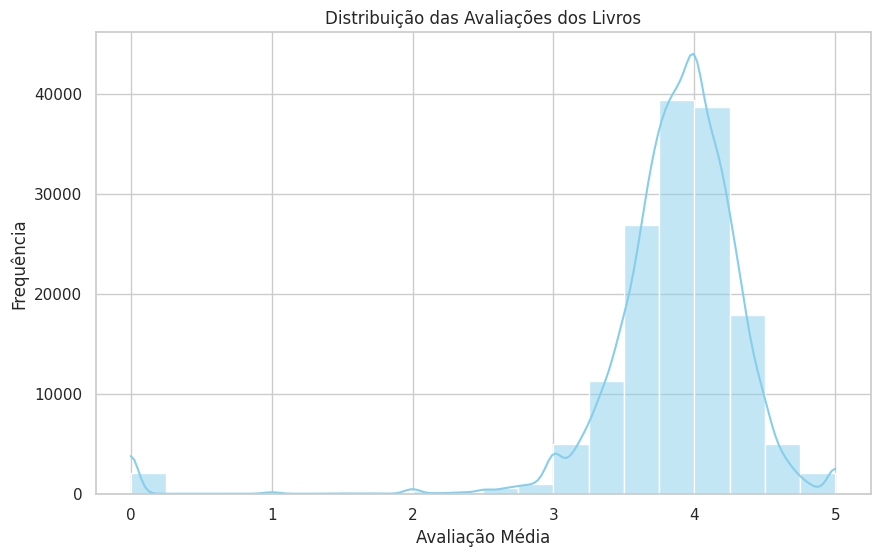

<ipython-input-10-03da853fd7c8>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette="viridis")


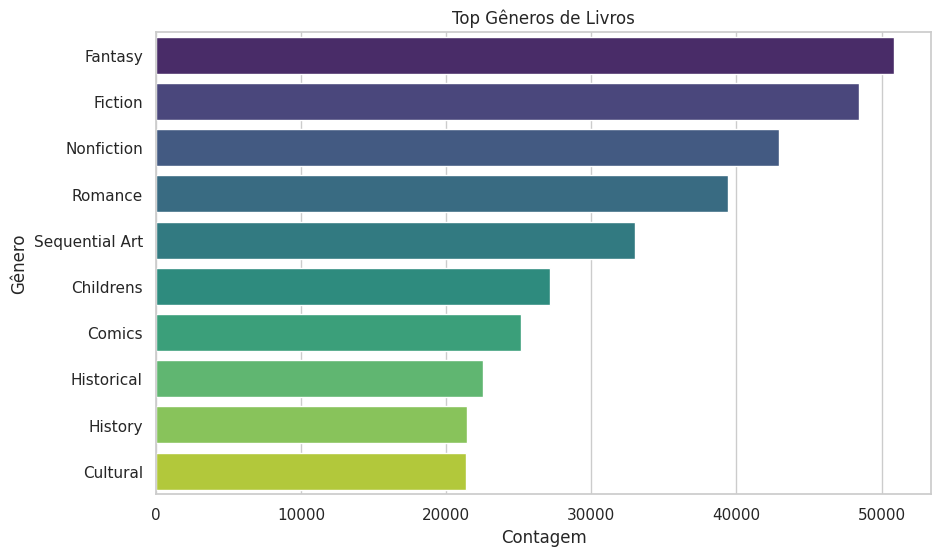

<ipython-input-10-03da853fd7c8>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_authors.index, x=top_authors.values, palette="coolwarm")


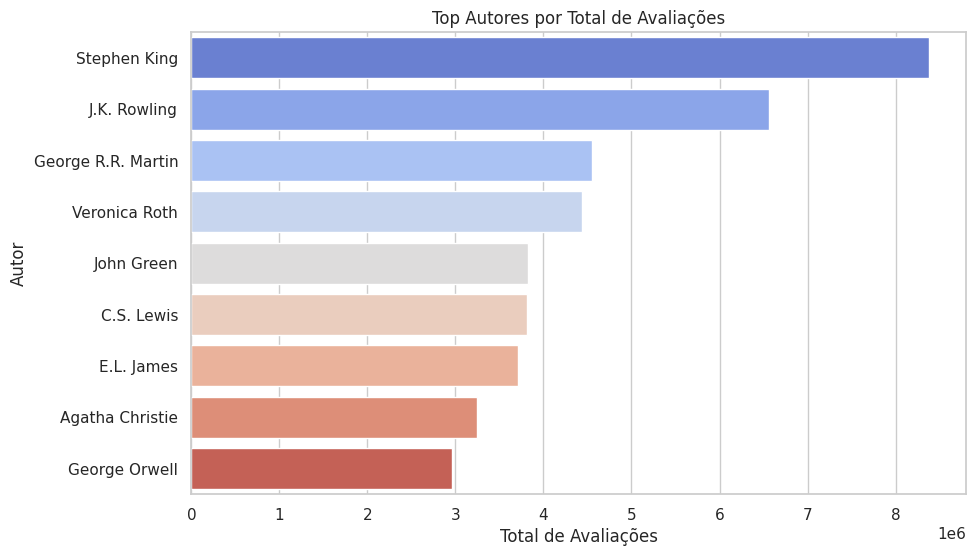

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV usando uma codificação alternativa
file_path = '/content/dataset/GoodReads_100k_books.csv'
books_df = pd.read_csv(file_path, encoding='utf-8-sig')

# Separar múltiplos autores para contagem individual
books_df['author'] = books_df['author'].str.split(',')
books_df = books_df.explode('author').reset_index(drop=True)

# Remover espaços adicionais ao redor dos nomes dos autores
books_df['author'] = books_df['author'].str.strip()

# Configuração para estilo dos gráficos
sns.set(style="whitegrid")

# Visualização 1: Distribuição das classificações
plt.figure(figsize=(10, 6))
sns.histplot(books_df['rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição das Avaliações dos Livros')
plt.xlabel('Avaliação Média')
plt.ylabel('Frequência')
plt.show()

# Visualização 2: Gêneros mais populares (top 10)
# Separando múltiplos gêneros e contando as ocorrências
genres_series = books_df['genre'].dropna().str.split(',').explode()
top_genres = genres_series.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_genres.index, x=top_genres.values, palette="viridis")
plt.title('Top Gêneros de Livros')
plt.xlabel('Contagem')
plt.ylabel('Gênero')
plt.show()

# Visualização 3: Autores mais populares (top 10) com mais avaliações totais
top_authors = books_df.groupby('author')['totalratings'].sum().nlargest(9)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values, palette="coolwarm")
plt.title('Top Autores por Total de Avaliações')
plt.xlabel('Total de Avaliações')
plt.ylabel('Autor')
plt.show()


# Preparação dos dados / pipeline de processamento

In [11]:
import pandas as pd

# Carregar o CSV, ignorando linhas com erros
df = pd.read_csv('/content/merged_dataset.csv')

# Selecionar as colunas relevantes com os nomes corretos
selected_columns = ['genre', 'reviews', 'rating']
df = df[selected_columns]

# Exibir as primeiras linhas para verificar
print(df.head())


                                               genre  reviews  rating
0  History,Military History,Civil War,American Hi...        5    3.52
1          Couture,Fashion,Historical,Art,Nonfiction        6    4.51
2                                   Politics,History        2    4.15
3                                      Labor,History        1    3.83
4                                                NaN        1    4.00


In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer

# Carregar o CSV e remover valores ausentes
df = pd.read_csv('/content/merged_dataset.csv', on_bad_lines='skip').dropna()

# Verificar se a coluna 'genre' existe antes de prosseguir
if 'genre' in df.columns:
    # Separar os gêneros em listas
    df['genre'] = df['genre'].apply(lambda x: x.split(','))

    # Usar MultiLabelBinarizer para transformar gêneros em colunas binárias
    mlb = MultiLabelBinarizer()
    genres_transformed = mlb.fit_transform(df['genre'])
    genres_df = pd.DataFrame(genres_transformed, columns=mlb.classes_, index=df.index)

    # Concatenar as colunas de gênero binarizadas com o DataFrame original
    df = pd.concat([df, genres_df], axis=1).drop(columns=['genre'])
else:
    print("A coluna 'genre' não está presente no DataFrame.")

# Separar as colunas numéricas e aplicar escalonamento aos dados numéricos
numerical_features = ['reviews', 'rating']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Exibir uma amostra dos dados processados
print(df.head())

df.to_csv('/content/dataset_processado.csv', index=False)
print("Arquivo 'dataset_processado.csv' salvo com sucesso!")


                             author bookformat  \
0              Laurence M. Hauptman  Hardcover   
1  Charlotte Fiell,Emmanuelle Dirix  Paperback   
2                     Andy Anderson  Paperback   
3              Carlotta R. Anderson  Hardcover   
5                   Jeffrey Pfeffer  Hardcover   

                                                desc  \
0  Reveals that several hundred thousand Indians ...   
1  Fashion Sourcebook - 1920s is the first book i...   
2  The seminal history and analysis of the Hungar...   
3  "All-American Anarchist" chronicles the life a...   
5  Why is common sense so uncommon when it comes ...   

                                                 img        isbn    isbn13  \
0  https://i.gr-assets.com/images/S/compressed.ph...  002914180X  9.78E+12   
1  https://i.gr-assets.com/images/S/compressed.ph...  1906863482  9.78E+12   
2  https://i.gr-assets.com/images/S/compressed.ph...   948984147  9.78E+12   
3  https://i.gr-assets.com/images/S/compressed.ph.

# Modelo Preditivo

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Carregar os dados
df = pd.read_csv('/content/dataset_processado.csv', on_bad_lines='skip', low_memory=False)

# Criar a coluna alvo (good_rating)
# Considera 'rating' acima de 3.0 como uma boa avaliação
df['good_rating'] = (df['rating'] >= 3.0).astype(int)

# Selecionar as features e o target
X = df.drop(columns=['rating', 'good_rating'])  # Exclui a coluna 'rating' e a nova coluna alvo
y = df['good_rating']  # Define a coluna alvo

# Dividir os dados em conjuntos de treino e teste (80% treino e 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibir os tamanhos dos conjuntos de treino e teste para verificação
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)


Tamanho do conjunto de treino: (57804, 1173)
Tamanho do conjunto de teste: (14451, 1173)


In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Carregar o CSV processado
df = pd.read_csv('/content/dataset_processado.csv', on_bad_lines='skip', low_memory=False)

# Criar a coluna alvo (good_rating)
df['good_rating'] = (df['rating'] >= 3.0).astype(int)

# Selecionar as features e o target
X = df.drop(columns=['rating', 'good_rating'])
y = df['good_rating']

# Filtrar apenas as colunas numéricas em X
X = X.select_dtypes(include=['number'])

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividir os dados balanceados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Instanciar e treinar o modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões de probabilidade no conjunto de teste
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Exibir as primeiras probabilidades para verificação
print("Probabilidades de uma boa avaliação (primeiras previsões):", y_pred_proba[:1000])


Probabilidades de uma boa avaliação (primeiras previsões): [0.99979686 0.         0.         0.         0.         0.
 0.         0.99979686 1.         1.         0.         1.
 0.99986049 0.         1.         1.         1.         1.
 1.         0.99994335 0.         1.         0.         0.
 1.         0.99935037 0.         0.         0.         0.99981283
 0.         0.         0.         1.         0.         0.
 1.         1.         1.         0.         0.         1.
 1.         1.         0.         0.99984861 1.         0.
 1.         1.         1.         0.         0.99935037 0.99965032
 0.         0.99981283 1.         0.         1.         1.
 0.99984688 0.         0.         0.         0.99980096 0.
 0.         0.99928118 0.         0.99981283 0.         0.
 0.99981283 0.         0.         0.         1.         0.
 0.         0.         0.         0.         0.99991358 0.
 0.         0.         0.999835   0.99980096 1.         1.
 0.99987669 0.         0.         0.9997

# Avaliação do Modelo

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# Calcular precisão
precision = precision_score(y_test, y_pred)
print("Precisão:", precision)

# Calcular recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Acurácia: 0.9985443454753405
Precisão: 0.9979273179494266
Recall: 0.9991698948533481



# Visualização Extra

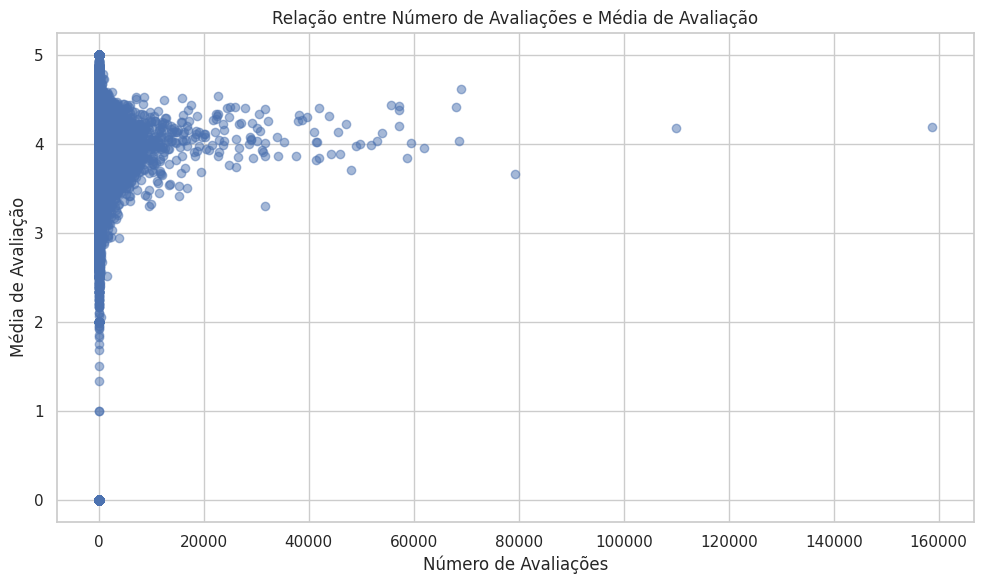

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('/content/merged_dataset.csv', on_bad_lines='skip')

# Remover linhas com valores ausentes nas colunas que queremos analisar
df = df.dropna(subset=['genre', 'reviews', 'rating'])

# Converter as colunas para os tipos corretos (caso necessário)
df['reviews'] = df['reviews'].astype(int)
df['rating'] = df['rating'].astype(float)


# Gráfico de Dispersão: Relação entre Número de Avaliações e Média de Avaliação
plt.figure(figsize=(10, 6))
plt.scatter(df['reviews'], df['rating'], alpha=0.5)
plt.title('Relação entre Número de Avaliações e Média de Avaliação')
plt.xlabel('Número de Avaliações')
plt.ylabel('Média de Avaliação')
plt.tight_layout()
plt.show()
